In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/gaurav sahani/Desktop/Deep Learning Projects/Car Types Project/Datasets/Train'
valid_path = 'C:/Users/gaurav sahani/Desktop/Deep Learning Projects/Car Types Project/Datasets/Test'

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('C:/Users/gaurav sahani/Desktop/Deep Learning Projects/Car Types Project/Datasets/Train/*')

In [6]:
folders

['C:/Users/gaurav sahani/Desktop/Deep Learning Projects/Car Types Project/Datasets/Train\\audi',
 'C:/Users/gaurav sahani/Desktop/Deep Learning Projects/Car Types Project/Datasets/Train\\lamborghini',
 'C:/Users/gaurav sahani/Desktop/Deep Learning Projects/Car Types Project/Datasets/Train\\mercedes']

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/gaurav sahani/Desktop/Deep Learning Projects/Car Types Project/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 90 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('C:/Users/gaurav sahani/Desktop/Deep Learning Projects/Car Types Project/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 27 images belonging to 3 classes.


In [14]:
# fit the model
from PIL import _imaging
from PIL import Image
import PIL
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=40,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
3/3 [==============================] - 6s 2s/step - loss: 5.9871 - accuracy: 0.3222 - val_loss: 1.5140 - val_accuracy: 0.3333
Epoch 2/40
3/3 [==============================] - 6s 2s/step - loss: 5.6605 - accuracy: 0.3667 - val_loss: 8.6404 - val_accuracy: 0.3333
Epoch 3/40
3/3 [==============================] - 5s 2s/step - loss: 7.0947 - accuracy: 0.3333 - val_loss: 3.1733 - val_accuracy: 0.3333
Epoch 4/40
3/3 [==============================] - 5s 2s/step - loss: 3.4383 - accuracy: 0.4444 - val_loss: 5.5959 - val_accuracy: 0.3333
Epoch 5/40
3/3 [==============================] - 5s 2s/step - loss: 3.5278 - accuracy: 0.4111 - val_loss: 2.5250 - val_accuracy: 0.3333
Epoch 6/40
3/3 [==============================] - 6s 2s/step - loss: 1.8571 - accuracy: 0.3889 - val_loss: 2.4985 - val_accuracy: 0.3333
Epoch 7/40
3/3 [==============================] - 5s 2s/step - loss: 1.6944 - accuracy: 0.5222 - val_l

In [15]:
r.history

{'loss': [5.9870686531066895,
  5.660475730895996,
  7.094721794128418,
  3.438255786895752,
  3.527771234512329,
  1.8570551872253418,
  1.694368600845337,
  1.2106444835662842,
  1.0532050132751465,
  1.1245583295822144,
  1.077784776687622,
  0.7670522332191467,
  0.817834198474884,
  0.6778634190559387,
  0.7167693972587585,
  0.7003158330917358,
  0.600702166557312,
  0.6150627732276917,
  0.5651224851608276,
  0.5844756364822388,
  0.5662781596183777,
  0.44356173276901245,
  0.5573626756668091,
  0.4941646456718445,
  0.4990682899951935,
  0.4019109010696411,
  0.4453251361846924,
  0.43266385793685913,
  0.3857959806919098,
  0.3623761534690857,
  0.34754982590675354,
  0.4008065164089203,
  0.3641015887260437,
  0.39525744318962097,
  0.3182767331600189,
  0.3161785900592804,
  0.33429068326950073,
  0.31679508090019226,
  0.2602151930332184,
  0.28215155005455017],
 'accuracy': [0.3222222328186035,
  0.36666667461395264,
  0.3333333432674408,
  0.4444444477558136,
  0.4111111

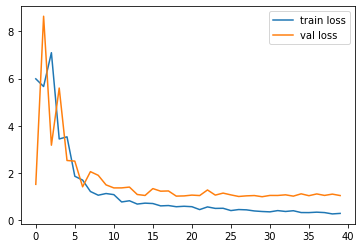

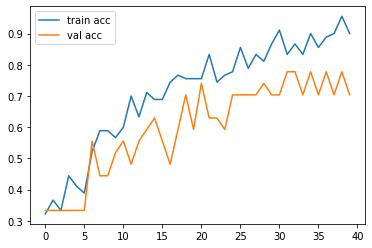

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [19]:
y_pred = model.predict(test_set)

In [20]:
y_pred

array([[3.3335915e-01, 8.6164055e-03, 6.5802449e-01],
       [2.2273310e-01, 1.9628048e-01, 5.8098638e-01],
       [4.4065490e-03, 9.9199343e-01, 3.6000675e-03],
       [2.6565393e-02, 4.1404265e-01, 5.5939192e-01],
       [2.4626890e-02, 1.6291077e-03, 9.7374403e-01],
       [7.3798694e-02, 7.7846444e-01, 1.4773688e-01],
       [1.1031779e-01, 5.4321373e-03, 8.8425004e-01],
       [4.5028314e-02, 2.5424019e-03, 9.5242935e-01],
       [4.7882029e-01, 7.2060153e-02, 4.4911948e-01],
       [8.6937264e-02, 8.8836491e-01, 2.4697820e-02],
       [4.0682787e-01, 3.3533499e-02, 5.5963862e-01],
       [4.2653583e-02, 7.2074383e-01, 2.3660254e-01],
       [5.0516233e-02, 8.9928502e-01, 5.0198764e-02],
       [8.0673003e-01, 6.5277673e-02, 1.2799227e-01],
       [2.6496438e-02, 9.2867953e-01, 4.4824015e-02],
       [9.5871997e-01, 1.8941524e-02, 2.2338405e-02],
       [8.3495951e-01, 1.2261679e-01, 4.2423673e-02],
       [1.6412485e-01, 3.3910969e-01, 4.9676546e-01],
       [3.5032448e-05, 1.689

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([2, 2, 1, 2, 2, 1, 2, 2, 0, 1, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 1,
       0, 1, 1, 0, 1], dtype=int64)

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('model_resnet50.h5')

In [26]:
img=image.load_img('C:/Users/gaurav sahani/Desktop/Deep Learning Projects/Car Types Project/Datasets/Train/audi/1.jpg',target_size=(224,224))

In [27]:
x=image.img_to_array(img)
x

array([[[233., 219., 208.],
        [234., 220., 209.],
        [237., 223., 212.],
        ...,
        [213., 216., 221.],
        [218., 221., 226.],
        [161., 164., 169.]],

       [[240., 226., 215.],
        [240., 226., 215.],
        [243., 229., 218.],
        ...,
        [213., 216., 221.],
        [217., 220., 225.],
        [161., 164., 169.]],

       [[247., 233., 222.],
        [247., 233., 222.],
        [250., 236., 225.],
        ...,
        [213., 216., 221.],
        [217., 220., 225.],
        [161., 164., 169.]],

       ...,

       [[130., 112., 108.],
        [135., 117., 113.],
        [138., 124., 123.],
        ...,
        [213., 212., 208.],
        [215., 210., 207.],
        [215., 210., 207.]],

       [[126., 108., 104.],
        [133., 115., 111.],
        [130., 116., 115.],
        ...,
        [217., 216., 212.],
        [218., 213., 210.],
        [218., 213., 210.]],

       [[121., 103.,  99.],
        [133., 115., 111.],
        [135., 1

In [28]:
x.shape

(224, 224, 3)

In [29]:
x=x/255

In [30]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

array([[0.4013913 , 0.07099608, 0.5276126 ]], dtype=float32)

In [32]:
a=np.argmax(model.predict(img_data), axis=1)

In [35]:
a==3

array([False])